In [25]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement ML Algorithms
import sklearn
from sklearn.ensemble import RandomForestRegressor # Random Forest

# Import MAPIE to calculate prediction intervals
from mapie.regression import MapieRegressor

# To calculate coverage score
from mapie.metrics import regression_coverage_score

# Package for data partitioning
from sklearn.model_selection import train_test_split
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns
# Package to implement Random Forest
import sklearn
from sklearn.ensemble import RandomForestClassifier
# Package for Regression
# from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.tree import DecisionTreeClassifier
# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier
# Package for generating classification report
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
# Package to record time
import time

# Package for Data pretty printer
from pprint import pprint

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# Package to record time
import time

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

In [26]:
df = pd.read_csv('California_airbnb_cleaned.csv')
df = df.dropna()
df

,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,accommodates,beds,minimum_nights,maximum_nights,number_of_reviews_ltm,review_scores_rating,instant_bookable,City,Region,bathrooms,price
0,0.0,18.0,1.0,Broadway-Manchester,33.945870,-118.275830,Private room in home,2.0,1.0,30.0,30.0,1.0,5.00,1.0,los-angeles,Arroyo Verdugo,2.0,10.0
1,0.0,2.0,1.0,Del Rey,33.985590,-118.429300,Private room in rental unit,2.0,1.0,30.0,60.0,0.0,5.00,0.0,los-angeles,Arroyo Verdugo,1.0,10.0
2,0.0,6.0,1.0,Pico-Union,34.045410,-118.272570,Private room in rental unit,1.0,1.0,30.0,150.0,2.0,4.67,0.0,los-angeles,Arroyo Verdugo,1.0,10.0
3,0.0,9.0,1.0,Monterey Park,34.056010,-118.145480,Private room in condo,1.0,2.0,180.0,720.0,0.0,4.33,1.0,los-angeles,Arroyo Verdugo,1.0,27.0
4,0.0,74.0,1.0,Westlake,34.075610,-118.286420,Private room in home,1.0,1.0,30.0,30.0,6.0,4.50,0.0,los-angeles,Arroyo Verdugo,3.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86620,1.0,10.0,1.0,Beverly Grove,34.069540,-118.364520,Entire villa,10.0,6.0,3.0,1125.0,2.0,4.92,0.0,los-angeles,Westside Cities,1.0,2414.0
86621,1.0,10.0,1.0,Beverly Crest,34.098070,-118.414610,Entire villa,14.0,7.0,2.0,365.0,6.0,4.95,0.0,los-angeles,Westside Cities,1.0,2506.0
86622,1.0,14.0,1.0,Pacific Palisades,34.040570,-118.556620,Entire home,8.0,6.0,4.0,1125.0,0.0,5.00,0.0,los-angeles,Westside Cities,1.0,3510.0
86623,1.0,128.0,1.0,Malibu,34.031872,-118.684242,Entire home,12.0,5.0,2.0,365.0,3.0,5.00,0.0,los-angeles,Westside Cities,1.0,5000.0


In [27]:
X = df.drop(columns = ['price', 'neighbourhood_cleansed', 'longitude', 'latitude'])
y = df['price']

In [28]:
X_encoded = pd.get_dummies(X)
X_encoded.head()

,host_is_superhost,host_total_listings_count,host_identity_verified,accommodates,beds,minimum_nights,maximum_nights,number_of_reviews_ltm,review_scores_rating,instant_bookable,...,City_los-angeles,Region_Arroyo Verdugo,Region_City of Los Angeles,Region_Gateway Cities COG,Region_Las Virgenes,Region_North Los Angeles County,Region_San Fernando Valley,Region_San Gabriel Valley Association of Cities,Region_South Bay Cities Association,Region_Westside Cities
0,0.0,18.0,1.0,2.0,1.0,30.0,30.0,1.0,5.00,1.0,...,True,True,False,False,False,False,False,False,False,False
1,0.0,2.0,1.0,2.0,1.0,30.0,60.0,0.0,5.00,0.0,...,True,True,False,False,False,False,False,False,False,False
2,0.0,6.0,1.0,1.0,1.0,30.0,150.0,2.0,4.67,0.0,...,True,True,False,False,False,False,False,False,False,False
3,0.0,9.0,1.0,1.0,2.0,180.0,720.0,0.0,4.33,1.0,...,True,True,False,False,False,False,False,False,False,False
4,0.0,74.0,1.0,1.0,1.0,30.0,30.0,6.0,4.50,0.0,...,True,True,False,False,False,False,False,False,False,False


In [29]:
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

In [30]:
reg = RandomForestRegressor(random_state = 42)

In [31]:
# Fit the model
start = time.time()            # Start Time
reg.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 98.47963833808899s


In [32]:
# Predict Test Set
y_pred = reg.predict(test_X)

# Evaluate the model on test set
r2 = sklearn.metrics.r2_score(test_y, y_pred)
print('R-squared on Test Set: %0.2f' %r2)

RMSE_test = sklearn.metrics.root_mean_squared_error(test_y, y_pred)
print('RMSE on Test Set: %0.2f' %RMSE_test)

R-squared on Test Set: 0.60
RMSE on Test Set: 227.04


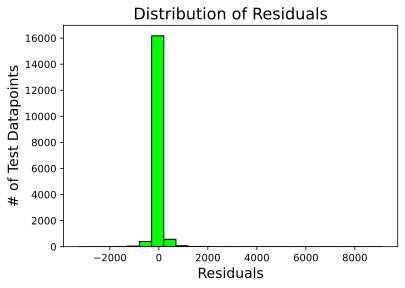

In [33]:
# Calculate the residuals by subtracting the predicted values from the actual test values
all_residuals = test_y - y_pred

# Set up the figure with custom size and resolution (DPI)
plt.figure(figsize=(6, 4), dpi = 150)

# Plot the histogram of residuals
plt.hist(all_residuals, bins = 25, color = 'lime', edgecolor = 'black')

# Label X and Y axes
plt.xlabel('Residuals', fontsize = 14)
plt.ylabel('# of Test Datapoints', fontsize = 14)

# Set the title of the plot
plt.title('Distribution of Residuals', fontsize = 16)

# Adjust the font size of x and y ticks
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

plt.savefig('rf_residual_plot.svg')

In [34]:
# Setting the figure size and resolution
plt.figure(figsize = (6, 4), dpi = 150)

# Scatter plot of actual vs predicted values
plt.scatter(test_y, y_pred, color = 'blue', alpha = 0.6, edgecolor = 'black', s = 40)

# 45-degree reference line (perfect predictions)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color = 'red', linestyle = '--', lw = 2)

# Axis labels and title
plt.xlabel('Actual Values', fontsize = 10)
plt.ylabel('Predicted Values', fontsize = 10)
plt.title('Predicted vs Actual Values', fontsize = 12)

# Adjust ticks
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

plt.savefig('rf_pred_vs_actual.svg')

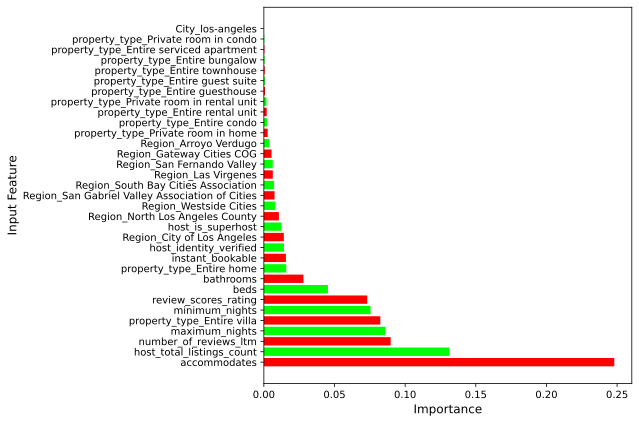

In [35]:
# Storing importance values from the trained model
importance = reg.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(9, 6))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['red', 'lime'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.yticks(fontsize = 10) # fontsize of yticks
plt.xticks(fontsize = 10) # fontsize of xticks

plt.tight_layout();
plt.savefig('rf_feature_imp.svg')

In [36]:
# Define MAPIE regressor
mapie = MapieRegressor(estimator = reg, # Prediction model to use
                       n_jobs = -1,
                       random_state = 42)

# Fit mapie regressor on training data
start = time.time()  
mapie.fit(train_X, train_y)
stop = time.time()             
print(f"Training time: {stop - start}s")

alpha = 0.1 # For 90% confidence level

Training time: 186.52548623085022s


In [ ]:
# Use mapie.predict() to get predicted values and intervals
y_test_pred, y_test_pis = mapie.predict(test_X[:5000], alpha = alpha)

In [ ]:
# Storing results in a dataframe
predictions = test_y[:5000].to_frame()
predictions.columns = ['Actual Price']
predictions["Predicted Price"] = y_test_pred.round(2)
predictions["Lower Price Limit"] = y_test_pis[:, 0].round(2)
predictions["Upper Price Limit"] = y_test_pis[:, 1].round(2)

# Take a quick look
predictions.tail(5)

,Actual Price,Predicted Price,Lower Price Limit,Upper Price Limit
33232,330.0,333.43,182.53,587.58
70006,52.0,104.39,-95.31,299.90
27876,137.0,132.23,-56.26,338.31
62098,234.0,310.43,133.58,528.88
78718,765.0,798.77,488.43,947.31


In [ ]:
coverage = regression_coverage_score(test_y[:5000],           # Actual values
                                     y_test_pis[:, 0], # Lower bound of prediction intervals
                                     y_test_pis[:, 1]) # Upper bound of prediction intervals

coverage_percentage = coverage * 100
print(f"Coverage: {coverage_percentage:.2f}%")

Coverage: 91.64%


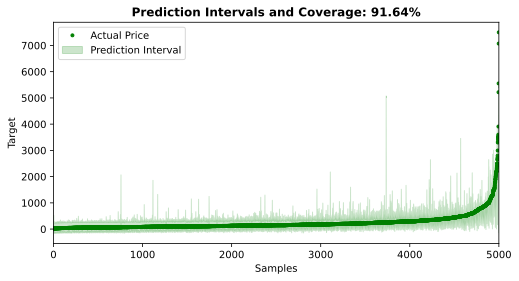

In [ ]:
# Sort the predictions by 'Actual Value' for better visualization and reset the index
sorted_predictions = predictions.sort_values(by=['Actual Price']).reset_index(drop=True)

# Create a figure and axis object with specified size and resolution
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the actual values with green dots
plt.plot(sorted_predictions["Actual Price"], 'go', markersize=3, label="Actual Price")

# Fill the area between the lower and upper bounds of the prediction intervals with semi-transparent green color
plt.fill_between(np.arange(len(sorted_predictions)),
                 sorted_predictions["Lower Price Limit"],
                 sorted_predictions["Upper Price Limit"],
                 alpha=0.2, color="green", label="Prediction Interval")

# Set font size for x and y ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set the limit for the x-axis to cover the range of samples
plt.xlim([0, len(sorted_predictions)])

# Label the x-axis and y-axis with appropriate font size
plt.xlabel("Samples", fontsize=10)
plt.ylabel("Target", fontsize=10)

# Add a title to the plot, including the coverage percentage, with bold formatting
plt.title(f"Prediction Intervals and Coverage: {coverage_percentage:.2f}%", fontsize=12, fontweight="bold")

# Add a legend to the plot, placed in the upper left, with specified font size
plt.legend(loc="upper left", fontsize=10);

plt.savefig("rf_coverage.svg")

In [ ]:
# Creating the file where we want to write the model
rf_pickle = open('rf_airbnb.pickle', 'wb') 

# Write DT model to the file
pickle.dump(mapie, rf_pickle) 

# Close the file
rf_pickle.close()